<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P1]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

Uma plataforma online, que atua na venda de produtos, deseja otimizar sua interface para melhorar a experiência do usuário e aumentar as taxas de conversão. Recentemente, a empresa implementou um redesign de sua página web, e os registros dessa mudança estão detalhados nos dados coletados desde então. As variáveis registradas diariamente incluem o número de visitantes únicos, sessões, taxa de rejeição, páginas por sessão, principais origens do tráfego, tipos de dispositivos usados, eventos ocorridos, taxa de conversão e o tempo médio de sessão.

Com base nesses dados, a empresa considera realizar uma mudança similar para otimizar ainda mais sua plataforma. Antes de proceder, a equipe deseja empregar simulações de Monte Carlo para avaliar os possíveis impactos de um novo redesign na taxa de conversão, tempo médio de sessão e taxa de rejeição, utilizando análises estatísticas para prever tendências futuras e ajustar estratégias de maneira informada. Essa abordagem visa garantir que as decisões tomadas maximizem as taxas de conversões, fundamentais para o sucesso contínuo da plataforma.

## Importação do dataset e das bibliotecas

In [ ]:
# Importação do dataset
# https://drive.google.com/file/d/1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr/view?usp=drive_link
!gdown 1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr

Downloading...
From: https://drive.google.com/uc?id=1K_2ZDsrhheRDKoHN2ynfLCPGPFiS2CZr
To: /content/ITL-SI10-2024-P1-dataset.csv
100% 7.03k/7.03k [00:00<00:00, 13.9MB/s]


In [ ]:
# Importação das bibliotecas
import pandas as pd

# Transforma o dataset em DataFrame Pandas
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')
print(df.head())

         Data  Visitantes Únicos  Sessões  Taxa de Rejeição (%)  \
0  2023-01-01              113.0    126.0             50.496714   
1  2023-01-02               90.0    157.0             49.438007   
2  2023-01-03               92.0    185.0             49.800231   
3  2023-01-04              130.0    206.0             50.251843   
4  2023-01-05              123.0    155.0             48.070931   

   Páginas por Sessão Principais Origens do Tráfego Dispositivos  Eventos  \
0            1.834201                        Direto      Desktop        8   
1            1.955760                        Social      Desktop        5   
2            2.285052                        Direto      Desktop        9   
3            2.325464                          Pago       Mobile        6   
4            2.267006                        Direto      Desktop        6   

   Taxa de Conversão (%)  Tempo Médio de Sessão (minutos)  
0               1.952083                         5.395516  
1             

## Questões

### Questão 1

**Análise Exploratória de Dados**: Faça a exploração dos dados, utilizando gráficos interativos. Identifique correlações entre as variáveis e apresente essas relações em uma matriz de correlação focada nas variáveis mais relevantes para a conversão de vendas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import norm

In [ ]:
import plotly.express as px
df = pd.read_csv('ITL-SI10-2024-P1-dataset.csv')

df['Data'] = pd.to_datetime(df['Data'])
print(df.describe())

                      Data  Visitantes Únicos     Sessões  \
count                   60          60.000000   60.000000   
mean   2023-01-30 12:00:00         301.133333  449.450000   
min    2023-01-01 00:00:00          90.000000  126.000000   
25%    2023-01-15 18:00:00         196.500000  298.750000   
50%    2023-01-30 12:00:00         319.500000  456.000000   
75%    2023-02-14 06:00:00         401.250000  616.000000   
max    2023-03-01 00:00:00         517.000000  769.000000   
std                    NaN         120.896295  182.619121   

       Taxa de Rejeição (%)  Páginas por Sessão    Eventos  \
count             60.000000           60.000000  60.000000   
mean              34.230939            4.007533   5.300000   
min               20.177732            1.834201   1.000000   
25%               24.860077            3.078881   3.750000   
50%               34.381987            4.027289   5.000000   
75%               43.013749            4.890745   6.250000   
max             

Com base nesses dados, consigo concluir diversas coisas. Primeiramente, existe uma grande variação de visitantes únicos e sessões, no qual o valor mínimo é de 90 visitantes com 126 sessões, e o valor máximo é de517 visitantes com 769 sessões. Isso indica uma grande flutuação na frequência de visitas à plataforma, que pode ser muito bem explorada e que pode ser causada por diversos fatores.  

Além disso, a taxa de rejeição varia de 20.17% a 50.49%, e tem média de 34.23%. Não é uma diferença muito discrepante entretanto é possivel identificar que de fato existe certos pontos que indicam a rejeição e que não esta atraindo os consumidores.

Em média, os usuários navegam por aproximadamente 4 páginas por sessão e gastam cerca de 10 minutos no site. E os valores indicam que quando engajados, os usuários interagem bastante com o conteúdo.

Po fim, a taxa de conversão média é de 4.59%, mas há uma grande variação que vai desde o mínimo 1.95% até o máximo 7.07%. Isso indica que existe dias que a plataforma consegue converter visitiantes em leads, já outros a conversão é menos eficaz e mostra um espaço para otimização.

Com essas informações iniciais, podemos identificar diversas areas para melhorias e otimização.




In [ ]:
# Visualização interativa de dispersão entre 'Visitantes Únicos' e 'Taxa de Conversão (%)'
fig = px.scatter(df, x='Visitantes Únicos', y='Taxa de Conversão (%)', title='Dispersão entre Visitantes Únicos e Taxa de Conversão')
fig.show()

O gráfico de dispersão permite com que a gente consiga identificar como funciona a variação entre a taxa de conversão e a quantidade de visitantes únicos. Como os próprios dados mostram existe uma vasta dispersão crescente que mostra que a medida que a quantidade de visitantes unicos cresce, a taxa de conversão cresce também. e o mínino valor de taxa de conversão vai desde um pouquinho menos que 2% visto que é um valor entre 100-150 visitantes, e o valor máximo de taxa de conversão é um pouquinho acima de 7% com aproximadamente 500 e poucos visitantes.

In [ ]:
# Preparação para a matriz de correlação, selecionando algumas colunas relevantes
colunas_relevantes = ['Visitantes Únicos', 'Taxa de Conversão (%)', 'Páginas por Sessão', 'Tempo Médio de Sessão (minutos)']
correlation_matrix = df[colunas_relevantes].corr()

# Matriz de correlação interativa
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", title='Matriz de Correlação entre Variáveis Selecionadas')
fig.show()

### Questão 2

**Simulação de Monte Carlo**: Implemente uma simulação de Monte Carlo para avaliar os possíveis efeitos de um novo redesign na plataforma. Analise como diferentes variáveis podem impactar os resultados e discuta os cenários que esta simulação pode prever, ajudando a empresa a tomar decisões mais informadas sobre o redesign.

In [ ]:
# Definição de parâmetros base para a simulação
n_simulacoes = 10000
taxa_conversao_atual = 0.04
impacto_redesign = np.random.normal(0.01, 0.004, n_simulacoes)


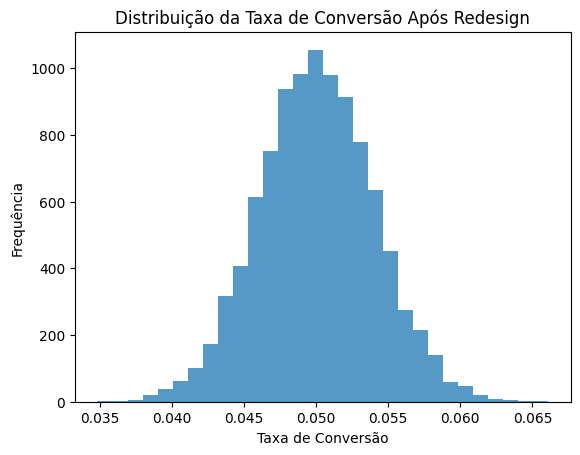

In [ ]:
resultados = taxa_conversao_atual + impacto_redesign
resultados = np.clip(resultados, 0, 1)  # limitando os valores entre 0 e 1

plt.hist(resultados, bins=30, alpha=0.75)
plt.title('Distribuição da Taxa de Conversão depois do Redesign')
plt.xlabel('Taxa de Conversão')
plt.ylabel('Frequência')
plt.show()

Com base nesse histograma conseguimos ver que ao realisar uma simulação cerca de 10000 vezes podemos ver como ocorre um impacto no resultadocaso eu faça um reddisgn. Analisando o histograma desenvolvido eu vejo que ele mostra que a maioria das simulações agrupadas em um valor mais alto do que a minha taxa de conversão padrão que eu estipulei (0.04) ele aponta que de fato houve um impacto positivo na conversão de leads no momento que eu realizei um redesign no meu site. Ele mostra que o redisgn seria de fato benéfico.

Com base nessa exploração, conseguimos ver que há cenários que essa simulação cosnegue prever. Por mais que o redesign seria positivo, não podemos deiar de lado que a possibilidade de uma taxa de convers˜ão menor do que a atual também é possivel. Ou seja, estrategias de mitigacao para evitar isso já poderiam ser planejadas para facilitar no processo de tomada de decisões estratégicas.

### Questão 3

**Análise de Sensibilidade**: Realize uma análise de sensibilidade para examinar como alterações em diferentes variáveis de entrada afetam as previsões da taxa de conversão.

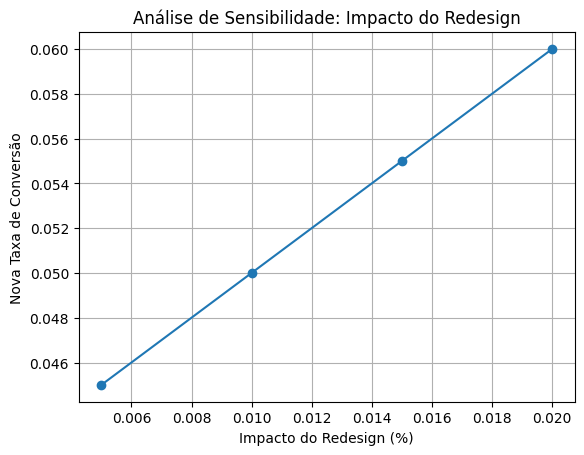

In [ ]:
taxa_conversao_atual = 0.04

impactos = [0.005, 0.01, 0.015, 0.02]
resultados_medios = []

for impacto in impactos:
    nova_taxa = taxa_conversao_atual + impacto
    resultados_medios.append(nova_taxa)

# Plotando os resultados
plt.plot(impactos, resultados_medios, marker='o')
plt.title('Análise de Sensibilidade: Impacto do Redesign')
plt.xlabel('Impacto do Redesign (%)')
plt.ylabel('Nova Taxa de Conversão')
plt.grid(True)
plt.show()


O gráfico foi criado com base na taxa de conversão atual - 4% e com o aumento para medir o impacto de 5%, 1%, 1,5% e 2%. E dessa forma é possivel ver como os diferentes impactos podem afetar a taxa de conversão "nova" que de acordo com gráfico seria - 5%(taxa menos que 4.6%), 1% (taxa 5%), 1.5%(taxa aproximadamente 5.5%) e 2% (taxa aproximadamente 6%). Veos o crescimento conforme impacto aumenta a taxa aumenta também.

## Entrega

Siga esses passos para entregar sua prova.

1. Crie um repositório no GitHub para essa entrega.

2. Submeta seu desenvolvimento neste repositório.

3. Garanta que o repositório é publicamente acessível (eliminatório).

4. No Google forms da prova, submeta a URL do repositório.